In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset_path = "/content/water_potability.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Data Preprocessing: Handling missing values
df.fillna(df.mean(), inplace=True)

In [4]:
# Splitting features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [5]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
# Building a Neural Network model with Batch Normalization, L2 Regularization, and Adam Optimizer
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [8]:
# Instantiate and train the model
model = build_model()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5880 - loss: 1.2246 - val_accuracy: 0.6782 - val_loss: 0.8290
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 0.7630 - val_accuracy: 0.6314 - val_loss: 0.7404
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6574 - loss: 0.7251 - val_accuracy: 0.6456 - val_loss: 0.7067
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6557 - loss: 0.6974 - val_accuracy: 0.6558 - val_loss: 0.6803
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6686 - loss: 0.6791 - val_accuracy: 0.6619 - val_loss: 0.6710
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6549 - loss: 0.6760 - val_accuracy: 0.6741 - val_loss: 0.6543
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6682 - loss: 0.6690 - val_accuracy: 0.6578 - val_loss: 0.6659
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6698 - loss: 0.6677 - val_accuracy: 0.6925 - val_loss

In [9]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
report = classification_report(y_test, y_pred)
print(report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       307
           1       0.63      0.32      0.42       185

    accuracy                           0.67       492
   macro avg       0.66      0.60      0.60       492
weighted avg       0.67      0.67      0.64       492



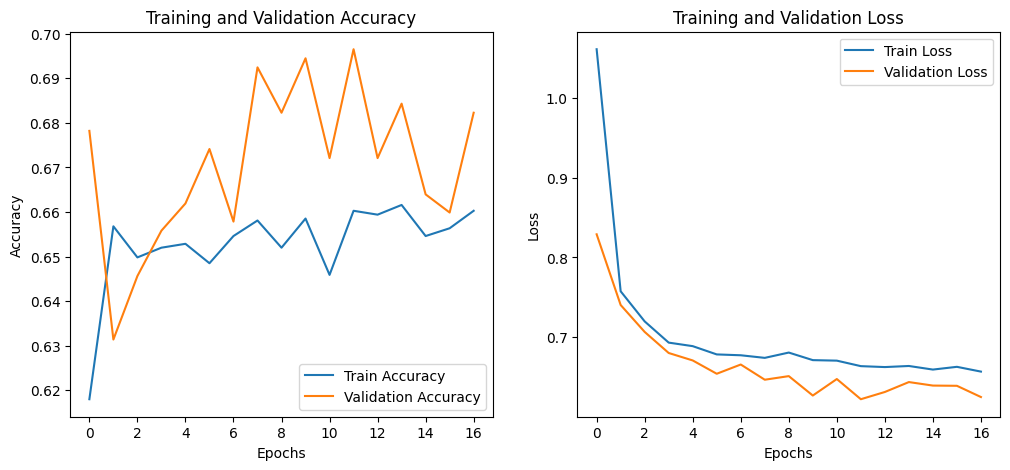

In [10]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()